In [61]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier

In [62]:
def CreateDataFrame(types,subtype, level):
    data = pd.read_csv('../Extraction/'+types+"/"+subtype+"/"+level+'.csv')
    data["Class"] = level
    return data

In [63]:
def LoadData(types,subtype):
    if(subtype=="All"):
        frames = [CreateDataFrame(types,"Roof","Clean"), 
              CreateDataFrame(types,"Roof","Dirty (0-20)"), 
              CreateDataFrame(types,"Roof","Dirty (20-40)"), 
              CreateDataFrame(types,"Roof","Dirty (40-60)"),
              CreateDataFrame(types,"Roof","Dirty (60-80)"),
              CreateDataFrame(types,"Roof","Dirty (80-100)"),
              CreateDataFrame(types,"Grass","Clean"), 
              CreateDataFrame(types,"Grass","Dirty (0-20)"), 
              CreateDataFrame(types,"Grass","Dirty (20-40)"), 
              CreateDataFrame(types,"Grass","Dirty (40-60)"),
              CreateDataFrame(types,"Grass","Dirty (60-80)"),
              CreateDataFrame(types,"Grass","Dirty (80-100)")]
    else:
        frames = [CreateDataFrame(types,subtype,"Clean"), 
              CreateDataFrame(types,subtype,"Dirty (0-20)"), 
              CreateDataFrame(types,subtype,"Dirty (20-40)"), 
              CreateDataFrame(types,subtype,"Dirty (40-60)"),
              CreateDataFrame(types,subtype,"Dirty (60-80)"),
              CreateDataFrame(types,subtype,"Dirty (80-100)")]
    df = pd.concat(frames)
    #Randomize
    df = shuffle(df)
    y=df[['Class']].copy()
    f = df[['FileAddress']].copy()
    X = df.copy()
    del X['Class']
    del X['FileAddress']
    return X,y,f

In [73]:
def AllWork(types,subtype,k=10):
    data = []
    X,y,f = LoadData(types,subtype)
    scaler = MinMaxScaler()
    X_01 = scaler.fit_transform(X)
    selector = SelectKBest(chi2, k)
    X_new = selector.fit_transform(X_01, y)
    mask = selector.get_support()
    new_features = X.columns[mask]
    X_new = X[new_features]
    print(X_new.head())
    X_new['Class'] = y
    X_new['FileAddress'] = f
    return selector,X
    #X_new.to_csv("Selection-"+types+'-'+subtype+'-'+str(k)+'.csv',index = False)

In [74]:
types = "NoBG" #"NoBG",Solar Data,Cropped
subtype = "All"#All,Grass,Roof
selector,data = AllWork(types,subtype,46)

          Amean         Avar     ASkew     AKurt       Rmean         Rvar  \
228  153.515821  1303.390371 -2.077492  7.878520  153.934893  1312.662992   
186  125.023715  1507.900865 -0.534565  0.894086  124.823769  1746.196622   
204  124.731935  1732.424046 -0.950656  0.793521  127.006008  1943.920754   
49   103.511431  2051.819884  1.254173  1.592298   98.627479  2190.028394   
554  118.917499  2283.111927 -0.161887 -0.615156  118.920730  2613.658446   

        RSkew     RKurt       Gmean         Gvar     ...      Energy20  \
228 -2.291652  7.705294  151.256633  1327.292328     ...      0.612589   
186 -0.514608  0.180766  124.944437  1571.600971     ...      0.212047   
204 -1.119300  0.485807  125.823165  1806.118600     ...      0.359769   
49   1.300533  1.525581   99.663197  2054.573381     ...      0.255652   
554 -0.207460 -0.898082  117.041355  2403.272896     ...      0.118725   

     Energy135  Correlation0  Correlation45  Correlation90  Correlation135  \
228   0.612366

In [75]:
selector

SelectKBest(k=46, score_func=<function chi2 at 0x000001B95D3E0840>)

In [76]:
selector.scores_

array([183.07742666,  41.60621212, 163.89720728, 236.9462626 ,
       187.25890383,  29.62724627, 150.04683384, 234.27409012,
       186.52897921,  32.01410017, 130.46471372, 212.51531103,
       112.00340991,  44.87478583, 114.84609757, 166.16568414,
       189.8220835 ,  23.76831238, 150.15587576, 202.24307243,
        58.81700703,  45.07094752,  85.93492305, 201.05867543,
       237.04299938, 203.85007311,  76.4827899 , 113.38527684,
        92.27615656, 109.23214587, 119.20258154, 121.36164102,
       124.89192332, 118.97959348,  95.20708159,  95.09391343,
        95.25489715,  95.13801021,  24.40353596,  60.75717475,
        52.1491661 ,  76.99763449, 120.30297919, 122.53626337,
       115.29905863, 120.63725045])

In [77]:
data.columns

Index(['Amean', 'Avar', 'ASkew', 'AKurt', 'Rmean', 'Rvar', 'RSkew', 'RKurt',
       'Gmean', 'Gvar', 'GSkew', 'GKurt', 'Bmean', 'Bvar', 'BSkew', 'BKurt',
       'Graymean', 'Grayvar', 'GraySkew', 'GrayKurt', 'BlackRatio',
       'WhiteRatio', 'Contrast0', 'Contrast45', 'Contrast90', 'Contrast135',
       'Dissimilarity0', 'Dissimilarity45', 'Dissimilarity20',
       'Dissimilarity2PI/2', 'Homogeneity0', 'Homogeneity45', 'Homogeneity90',
       'Homogeneity135', 'Energy0', 'Energy45', 'Energy20', 'Energy135',
       'Correlation0', 'Correlation45', 'Correlation90', 'Correlation135',
       'Entropy0', 'Entropy45', 'Entropy90', 'Entropy135'],
      dtype='object')

In [118]:
features = dict(zip(data.columns, selector.scores_))

In [123]:
import operator
sortedfeatured = sorted(features.items(), key=operator.itemgetter(1),reverse = True)

In [124]:
sortedfeatured

[('Contrast90', 237.042999382415),
 ('AKurt', 236.94626259646725),
 ('RKurt', 234.27409011753616),
 ('GKurt', 212.51531102536933),
 ('Contrast135', 203.85007310714235),
 ('GrayKurt', 202.24307242760787),
 ('Contrast45', 201.05867542572986),
 ('Graymean', 189.82208349844908),
 ('Rmean', 187.25890382864208),
 ('Gmean', 186.52897920770837),
 ('Amean', 183.07742665733662),
 ('BKurt', 166.16568414376144),
 ('ASkew', 163.8972072780817),
 ('GraySkew', 150.15587576180144),
 ('RSkew', 150.04683383595147),
 ('GSkew', 130.4647137168938),
 ('Homogeneity90', 124.89192331619057),
 ('Entropy45', 122.53626336513992),
 ('Homogeneity45', 121.36164101941489),
 ('Entropy135', 120.63725044650045),
 ('Entropy0', 120.30297918854978),
 ('Homogeneity0', 119.20258153790043),
 ('Homogeneity135', 118.97959348201653),
 ('Entropy90', 115.29905863453115),
 ('BSkew', 114.8460975695505),
 ('Dissimilarity45', 113.3852768429372),
 ('Bmean', 112.0034099130786),
 ('Dissimilarity2PI/2', 109.23214586815806),
 ('Energy20', 9

In [193]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

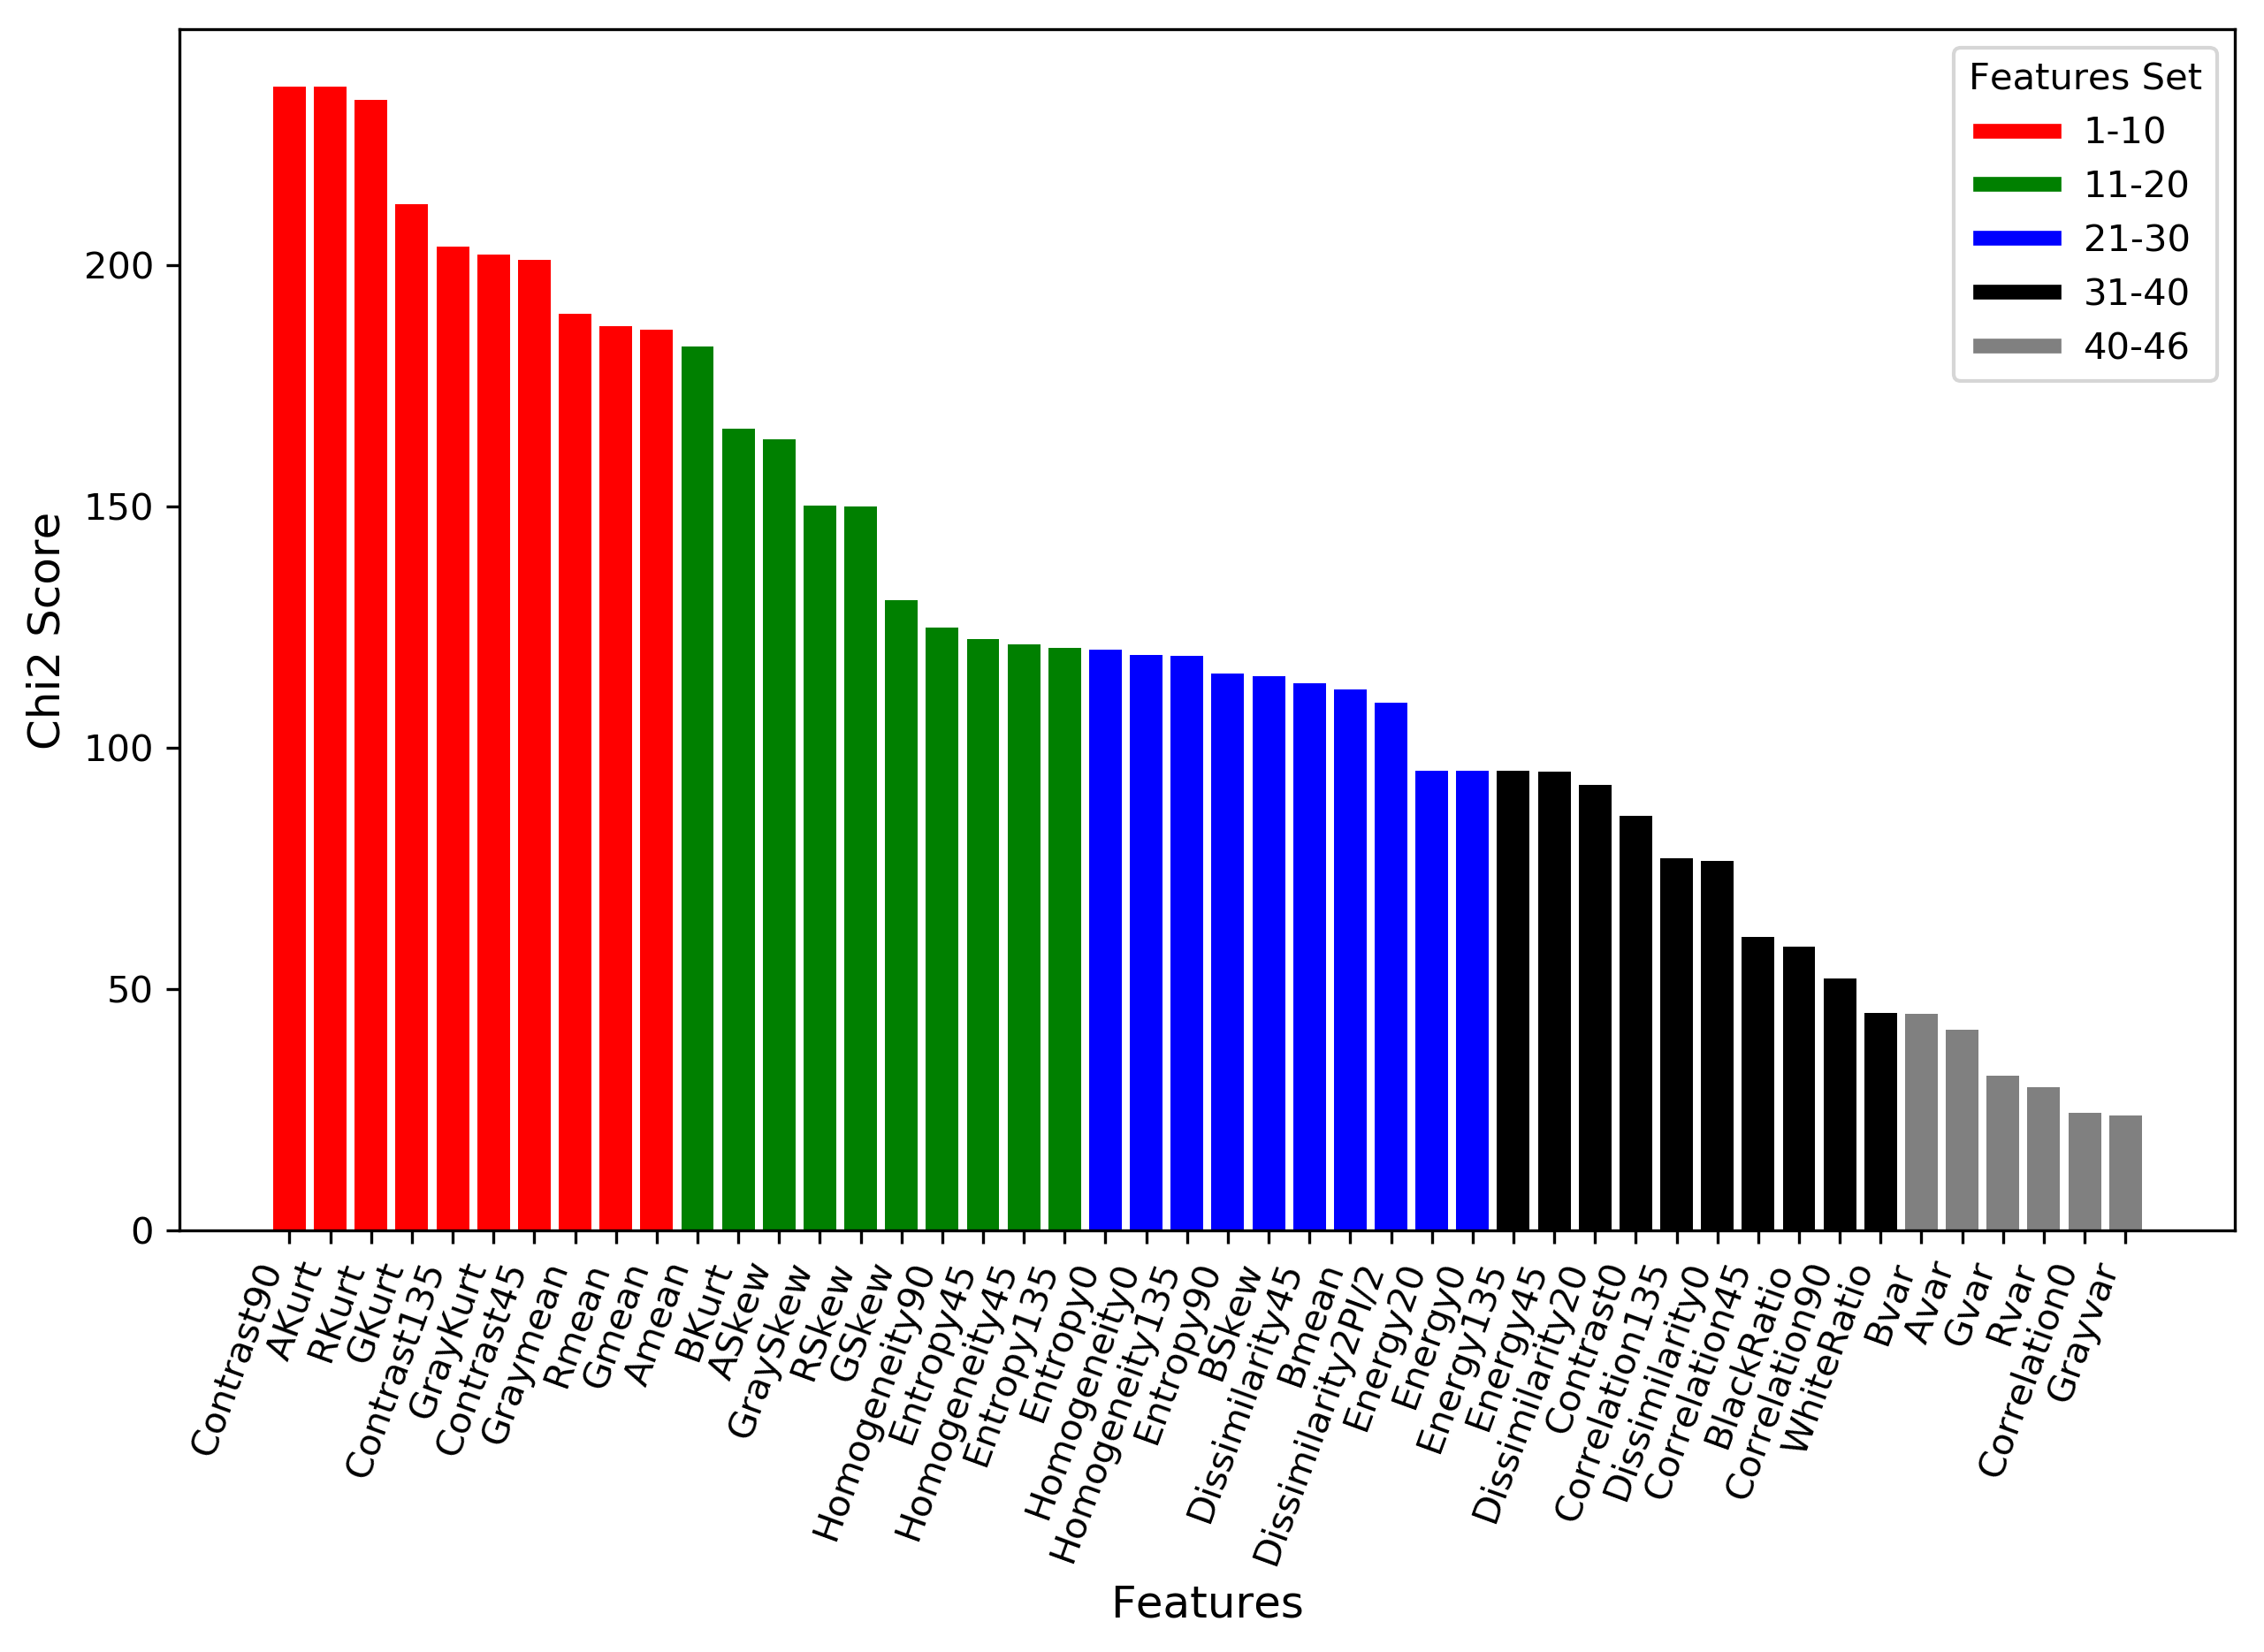

In [219]:
fig = plt.figure(figsize=(10,6),dpi=300)
ax = fig.add_subplot(111)
x, y = zip(*sortedfeatured) # unpack a list of pairs into two tuples
x = np.array(x)
y = np.array(y)

colors = np.array(['gray']*len(dfstacked))
colors[range(0,10)] = 'r'
colors[range(10,20)] = 'g'
colors[range(20,30)] = 'b'
colors[range(30,40)] = 'k'

plt.bar(x, y,color=colors)
ax.set_xticklabels(x,rotation = 70, ha="right")
plt.ylabel("Chi2 Score",fontsize=12)
plt.xlabel("Features",fontsize=12)

legend_elements = [Line2D([0], [0], color='r',lw=4, label='1-10'),
                   Line2D([0], [0], color='g',lw=4, label='11-20'),
                   Line2D([0], [0], color='b',lw=4, label='21-30'),
                   Line2D([0], [0], color='k',lw=4, label='31-40'),
                   Line2D([0], [0], color='gray',lw=4, label='40-46')]
ax.legend(handles=legend_elements,title="Features Set")
plt.show()
fig.savefig('Stylized Plots.png', dpi=300, bbox_inches='tight', transparent=True)